# VAE using a probabilistic causal model 

## Setup

In [1]:
from __future__ import absolute_import

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

## Load data

In [4]:
dataset_zip = np.load('/home/jupyter/causalML/tutorials/data/dsprites-dataset/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle=True, encoding='bytes')
# dataset_zip = np.load('/home/jupyter/causalML/tutorials/data/dsprites-dataset/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz')

imgs = dataset_zip['imgs']
latents_values = dataset_zip['latents_values']
latents_classes = dataset_zip['latents_classes']
metadata = dataset_zip['metadata'][()]

In [10]:
metadata.keys()

dict_keys([b'date', b'description', b'version', b'latents_names', b'latents_possible_values', b'latents_sizes', b'author', b'title'])

In [13]:
# Define number of values per latents and functions to convert to indices
latents_sizes = metadata[b'latents_sizes']
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:],
                                np.array([1,])))

def latent_to_index(latents):
    return np.dot(latents, latents_bases).astype(int)

def sample_latent(size=1):
    samples = np.zeros((size, latents_sizes.size))
    for lat_i, lat_size in enumerate(latents_sizes):
        samples[:, lat_i] = np.random.randint(lat_size, size=size)
    return samples

In [15]:
# Helper function to show images
def show_images_grid(imgs_, num_images=25):
    ncols = int(np.ceil(num_images**0.5))
    nrows = int(np.ceil(num_images / ncols))
    _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
    axes = axes.flatten()

    for ax_i, ax in enumerate(axes):
        if ax_i < num_images:
            ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
            ax.set_xticks([])
            ax.set_yticks([])
    else:
        ax.axis('off')

# def show_density(imgs):
#     _, ax = plt.subplots()
#     ax.imshow(imgs.mean(axis=0), interpolation='nearest', cmap='Greys_r')
#     ax.grid('off')
#     ax.set_xticks([])
#     ax.set_yticks([])

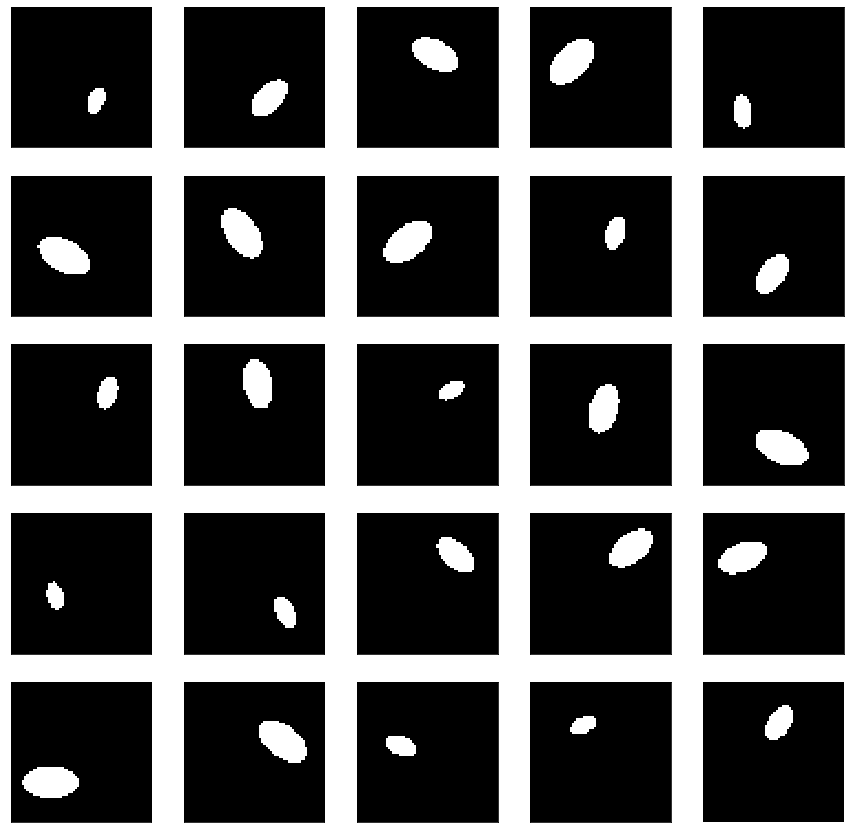

In [49]:
# Sample latents randomly
latents_sampled = sample_latent(size=5000)
# latents_sampled[:, 1] = 1

# Select images
indices_sampled = latent_to_index(latents_sampled)
imgs_sampled = imgs[indices_sampled]

# Show images
show_images_grid(imgs_sampled)

In [52]:
# image data
imgs_sampled[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [51]:
# for classifier, target (y) variable is latents_sampled[:, 1], taking values 0, 1, 2
latents_sampled[0]

array([ 0.,  1.,  0., 27., 22., 26.])